In [2]:
!pip install adversarial-robustness-toolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, ProjectedGradientDescent

In [4]:
import sys
sys.path.append(sys.path.append('/content/drive/My Drive/CURIS/VeriX/train_networks'))

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import matplotlib.pyplot as plt
def plot_figure(image, path=None, cmap=None):
    fig = plt.figure()
    ax = plt.Axes(fig, [-0.5, -0.5, 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(image, cmap=cmap)
    if path is not None:
      plt.savefig(path, bbox_inches='tight')
    # plt.close(fig)

In [6]:
tf.compat.v1.disable_eager_execution()

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [31]:
network_path = 'drive/MyDrive/CURIS/VeriX/networks/'
output_path = 'drive/MyDrive/CURIS/VeriX/adv_samples/'

In [9]:
!ls drive/MyDrive/CURIS/VeriX/networks

gtsrb-100x2.h5		 mnist-30x2-normal.h5
gtsrb-100x2.onnx	 mnist-30x2-normal.onnx
gtsrb-10x2.h5		 mnist-30x2.onnx
gtsrb-10x2.onnx		 mnist-30x2-pgd.h5
gtsrb-30x2.h5		 mnist-30x2-pgd.onnx
gtsrb-30x2.onnx		 mnist-bigger-cnn.h5
gtsrb-cnn-3x3.h5	 mnist-bigger-cnn.onnx
gtsrb-cnn-3x3.onnx	 mnist-bigger-cnn-pooling.h5
gtsrb-sota.h5		 mnist-bigger-cnn-pooling.onnx
gtsrb-sota.onnx		 mnist-cnn-3x3.h5
mnist-100x2.h5		 mnist-cnn-3x3.onnx
mnist-100x2-normal.h5	 mnist-cnn-pooling.h5
mnist-100x2-normal.onnx  mnist-cnn-pooling.onnx
mnist-100x2.onnx	 mnist-simple-cnn.h5
mnist-100x2-pgd.h5	 mnist-simple-cnn-normal.h5
mnist-100x2-pgd.onnx	 mnist-simple-cnn-normal.onnx
mnist-10x2.h5		 mnist-simple-cnn.onnx
mnist-10x2-normal.h5	 mnist-simple-cnn-pgd.h5
mnist-10x2-normal.onnx	 mnist-simple-cnn-pgd.onnx
mnist-10x2.onnx		 mnist-sota.h5
mnist-10x2-pgd.h5	 mnist-sota-normal.h5
mnist-10x2-pgd.onnx	 mnist-sota.onnx
mnist-30x2.h5		 mnist-sota-pgd.h5


In [26]:
model_name = 'mnist-30x2-normal'
model = keras.models.load_model(network_path + model_name + '.h5')

In [18]:
art_model = KerasClassifier(model, clip_values=(0, 1))
pgd_attack = ProjectedGradientDescent(art_model, eps=0.1, eps_step=0.01, max_iter=10, verbose=False)
adv_samples = pgd_attack.generate(x_test, batch_size=128)

In [36]:
np.save(output_path + model_name + '-pgd-samples', adv_samples)

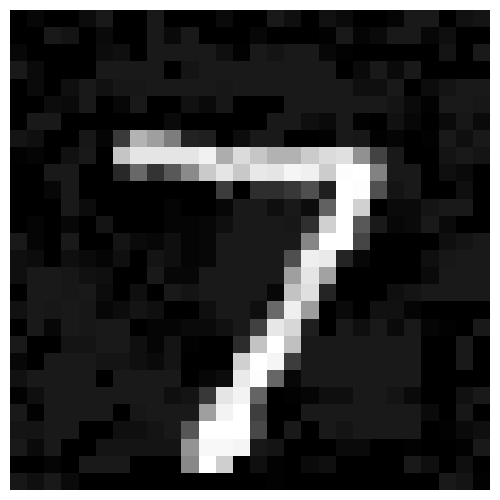

In [39]:
plot_figure(adv_samples[0], cmap='gray')

In [12]:
normal_10x2 = keras.models.load_model(network_path + 'mnist-10x2-normal.h5')
pgd_10x2 = keras.models.load_model(network_path + 'mnist-10x2-pgd.h5')

In [23]:
normal_10x2.evaluate(adv_samples, y_test)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[4.800171123504638, 0.2582]

In [24]:
pgd_10x2.evaluate(adv_samples, y_test)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.5058376734614373, 0.8266]